# Heart Disease Dataset Analysis
## Exploratory Data Analysis and Feature Engineering

### Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_style('whitegrid')
%matplotlib inline


### Load the Dataset

In [2]:
df = pd.read_csv('heart.csv')

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Understanding the Features

- **age**: Age in years
- **sex**: Sex (1 = male, 0 = female)
- **cp**: Chest pain type (0-3)
- **trestbps**: Resting blood pressure (in mm Hg)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg**: Resting electrocardiographic results (0-2)
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: Slope of the peak exercise ST segment (0-2)
- **ca**: Number of major vessels (0-4) colored by fluoroscopy
- **thal**: Thalassemia (0-3)
- **target**: Heart disease diagnosis (1 = disease, 0 = no disease)

## Exploratory Data Analysis (EDA)

### Basic Information

In [3]:
print("Missing values in each column:")
print(df.isnull().sum())

print("\nBasic statistics:")
df.describe().T

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Basic statistics:


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [4]:
print("Data types:")
df.dtypes

Data types:


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("Duplicate rows:")
    duplicate_rows = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))
    display(duplicate_rows)
    
    if len(duplicate_rows) > 0:
        print("\nColumns with identical values in duplicates:")
        for col in df.columns:
            if duplicate_rows[col].nunique() == 1:
                print(f"- {col}: {duplicate_rows[col].iloc[0]}")
    
    df_clean = df.drop_duplicates(keep='first')
    print(f"\nAfter removing duplicates: {df.shape[0]} → {df_clean.shape[0]} rows")

    df = df_clean

Number of duplicate rows: 1
Duplicate rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1



Columns with identical values in duplicates:
- age: 38
- sex: 1
- cp: 2
- trestbps: 138
- chol: 175
- fbs: 0
- restecg: 1
- thalach: 173
- exang: 0
- oldpeak: 0.0
- slope: 2
- ca: 4
- thal: 2
- target: 1

After removing duplicates: 303 → 302 rows


### Distribution of Target Variable

Target distribution:
target
1    164
0    138
Name: count, dtype: int64
Percentage of patients with heart disease: 54.30%


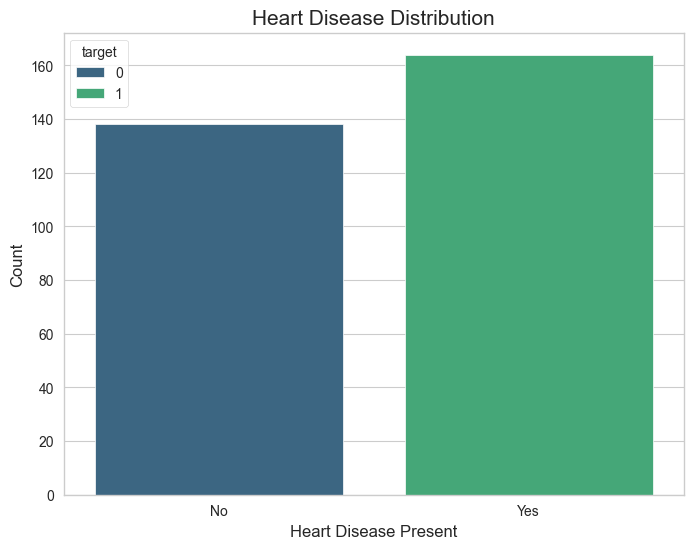

In [6]:
target_counts = df['target'].value_counts()
print("Target distribution:")
print(target_counts)
print(f"Percentage of patients with heart disease: {target_counts[1]/len(df)*100:.2f}%")

plt.figure(figsize=(8, 6))
sns.countplot(x='target', hue='target', data=df, palette='viridis')
plt.title('Heart Disease Distribution', fontsize=15)
plt.xlabel('Heart Disease Present', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### Univariate Analysis

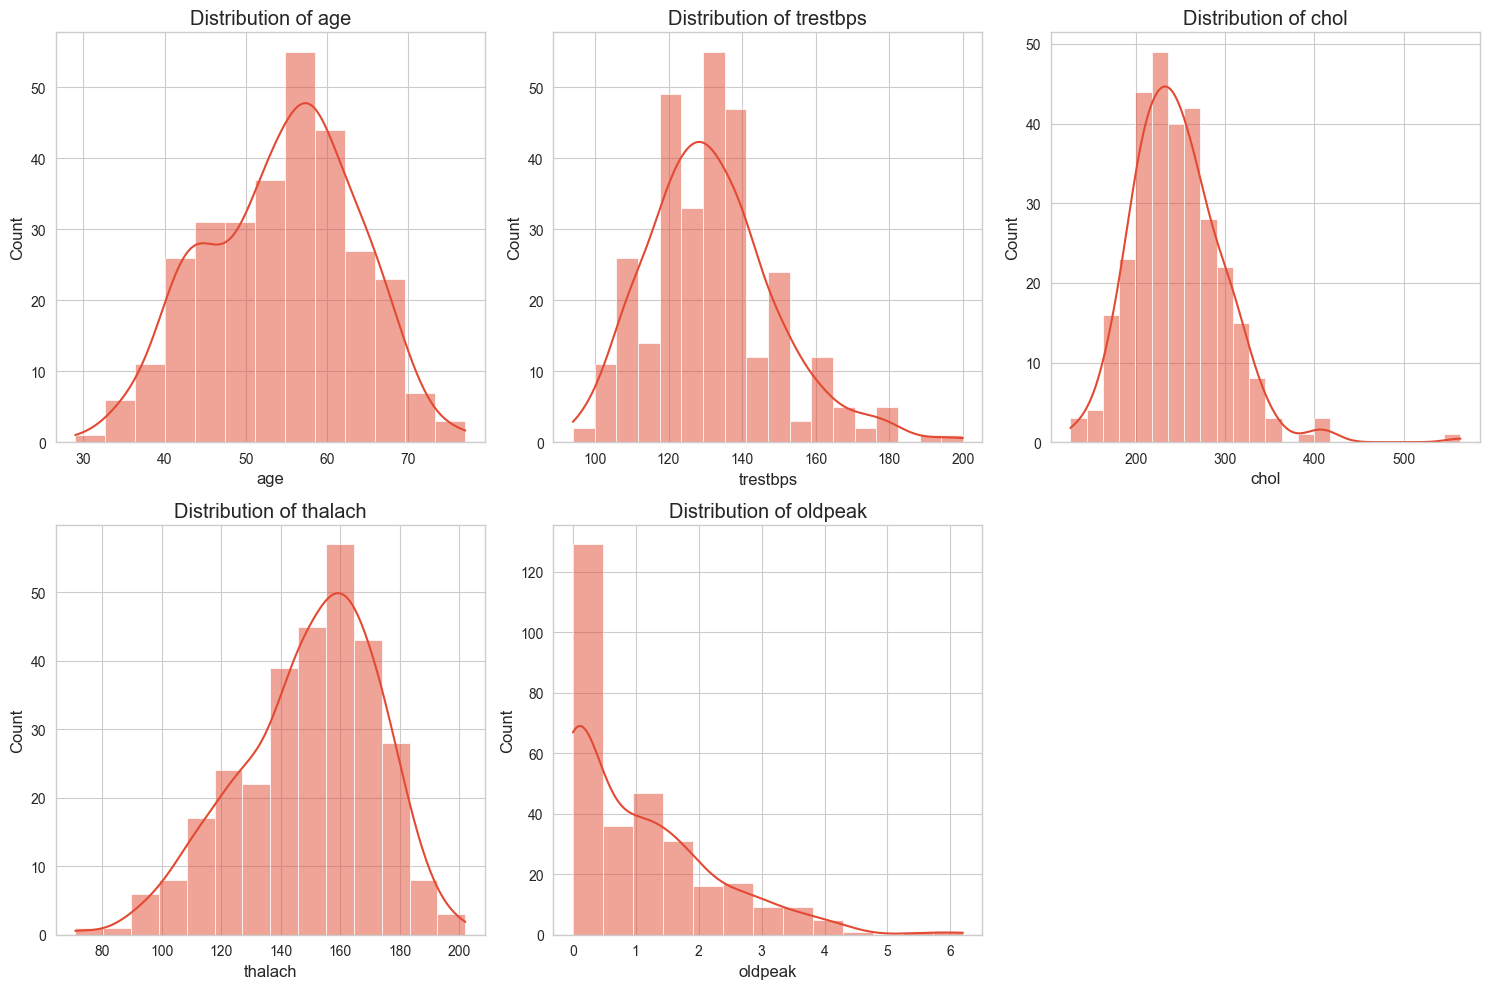

In [7]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Categorical features distribution


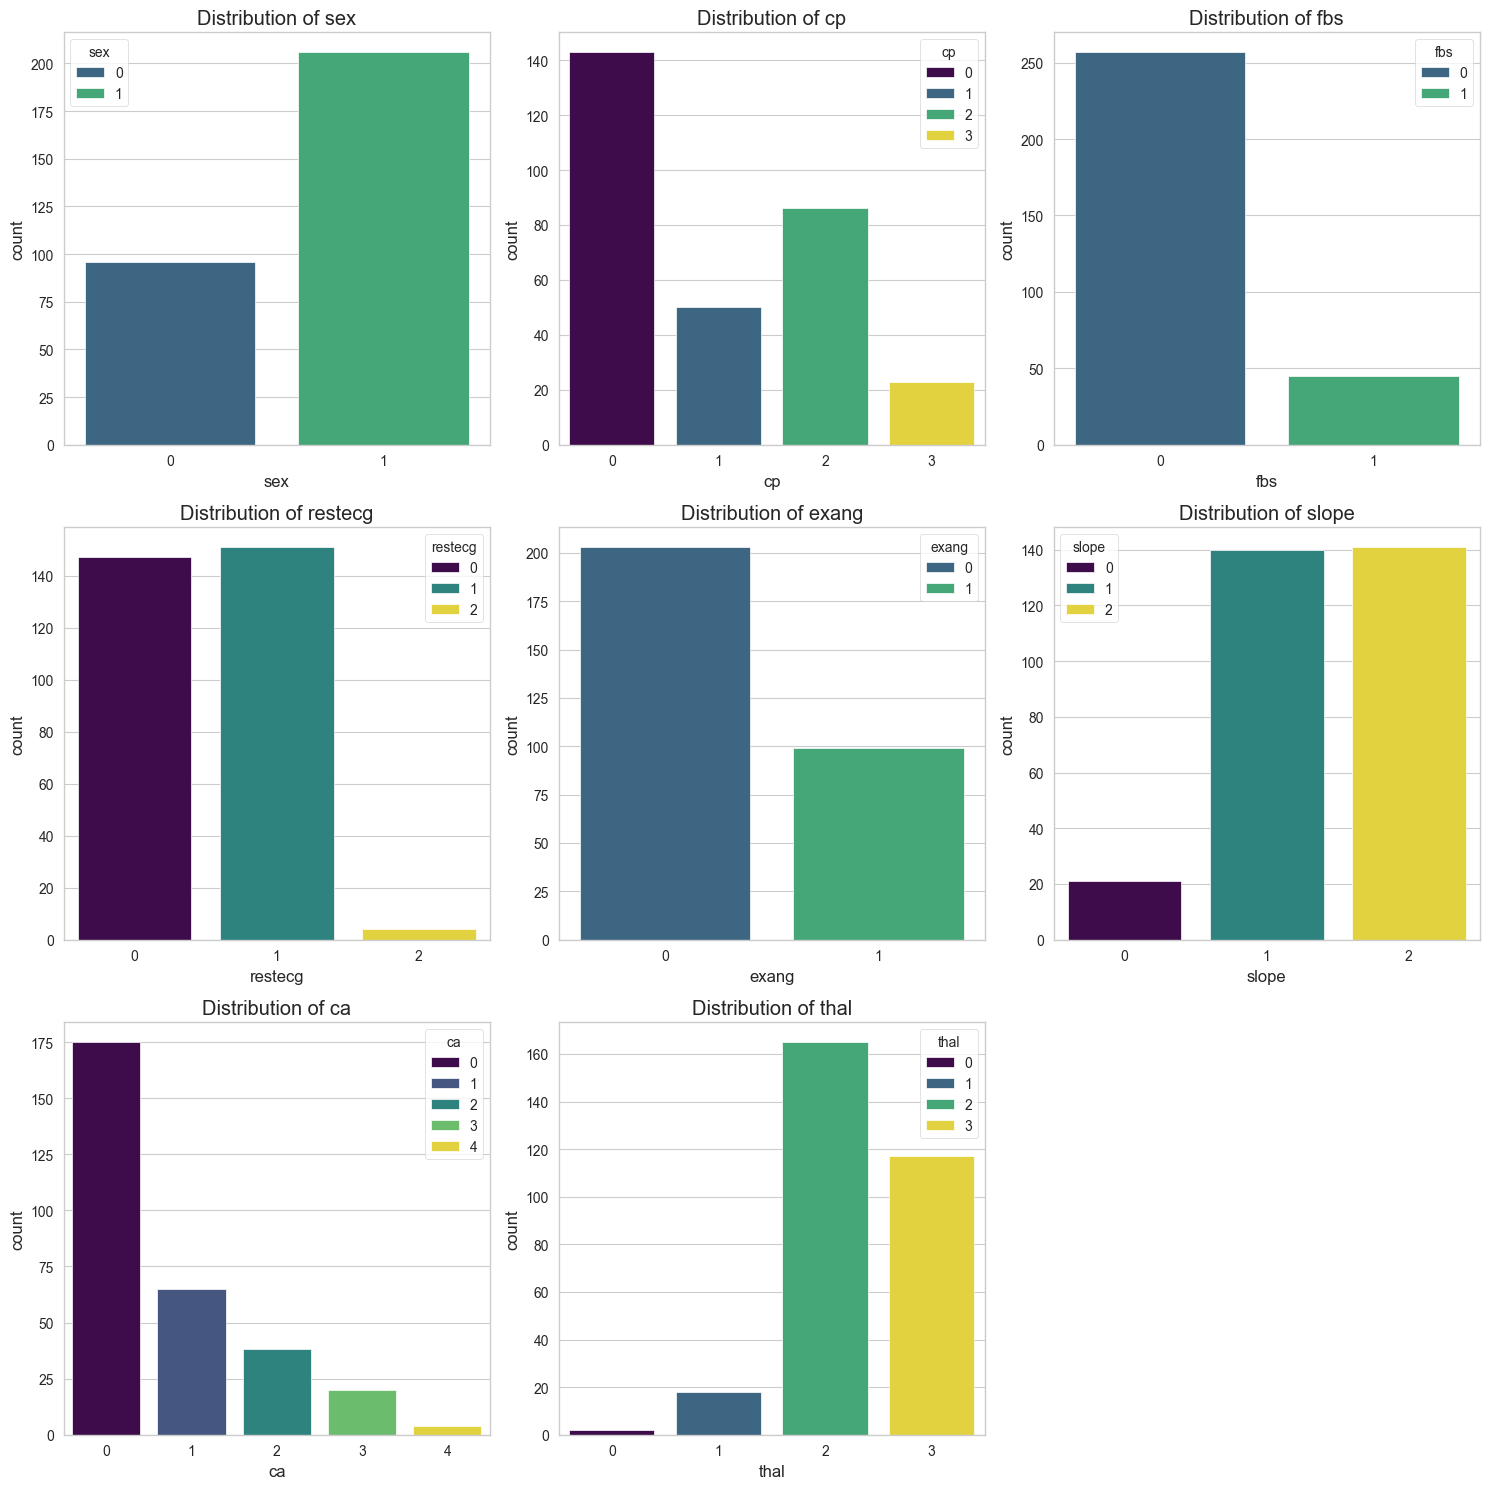

In [8]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(15, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=feature, hue=feature, data=df, palette='viridis')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

### Bivariate Analysis

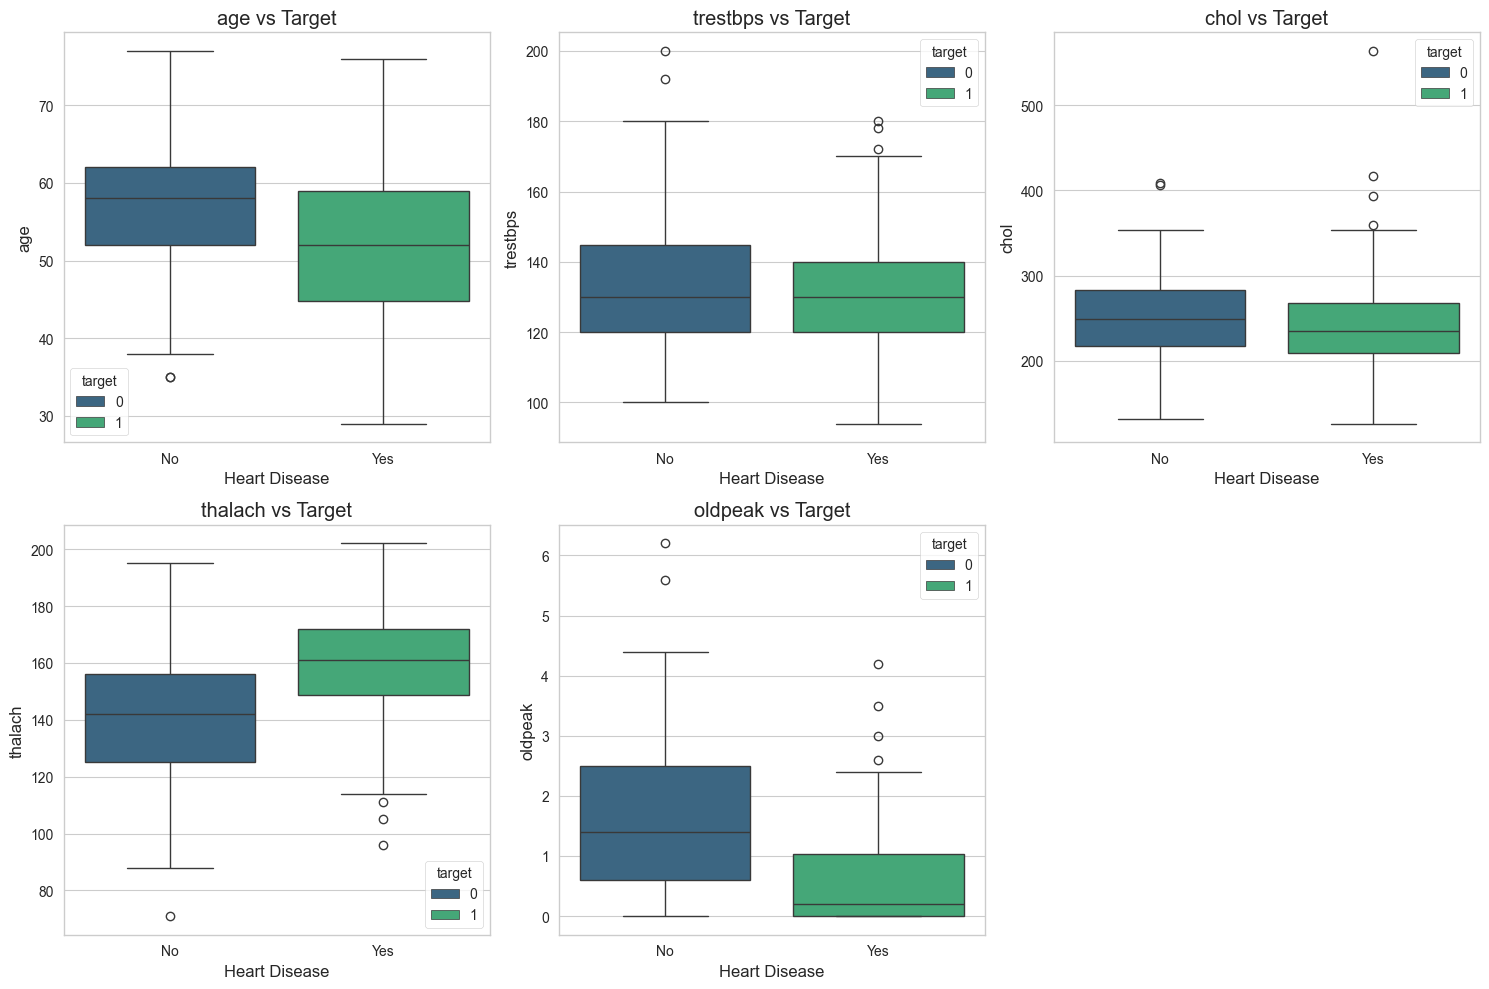

In [9]:
# Relationship between numerical features and target

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=feature, hue='target', data=df, palette='viridis')
    plt.title(f'{feature} vs Target')
    plt.xlabel('Heart Disease')
    plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

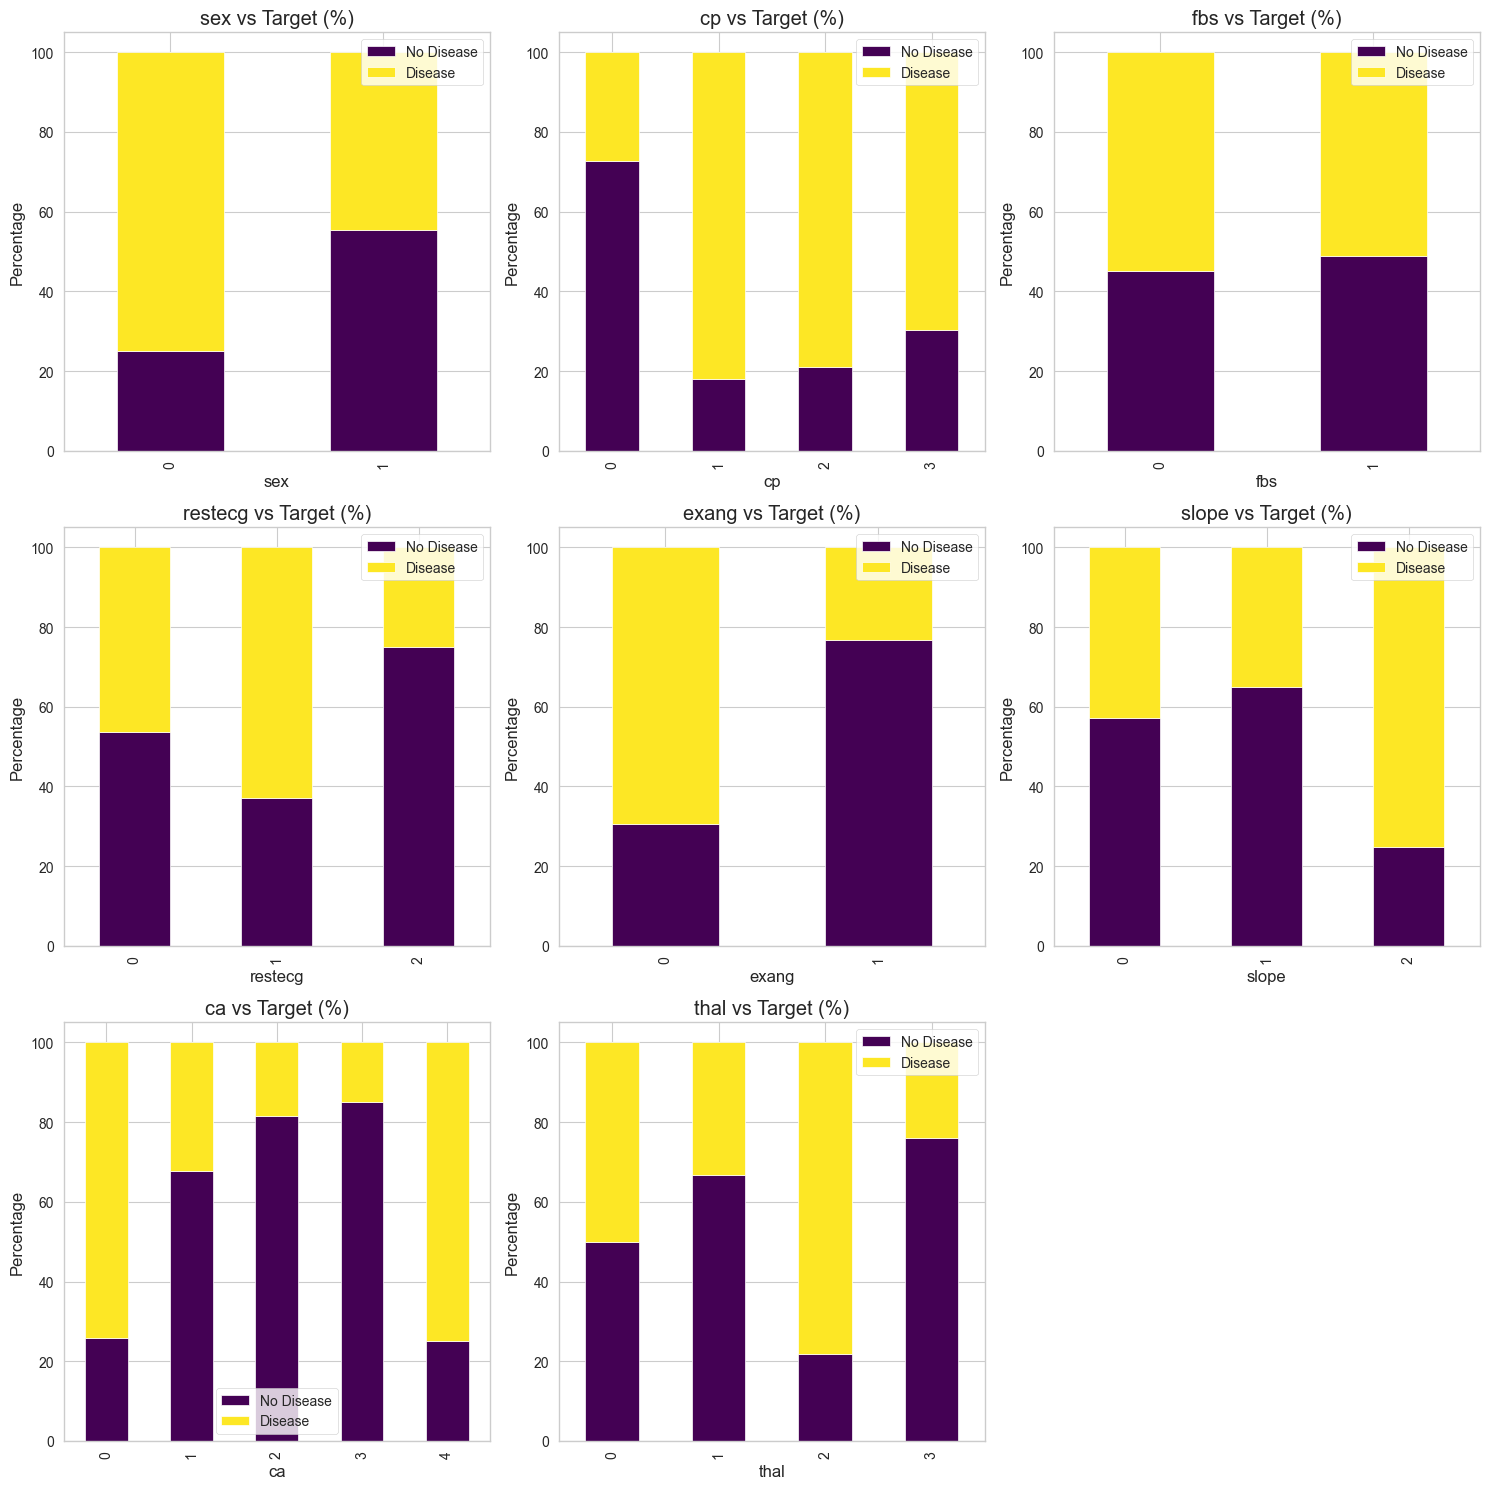

In [10]:
# Relationship between categorical features and target

plt.figure(figsize=(15, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    
    cross_tab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
    
    plt.title(f'{feature} vs Target (%)')
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.legend(['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

### Correlation Analysis

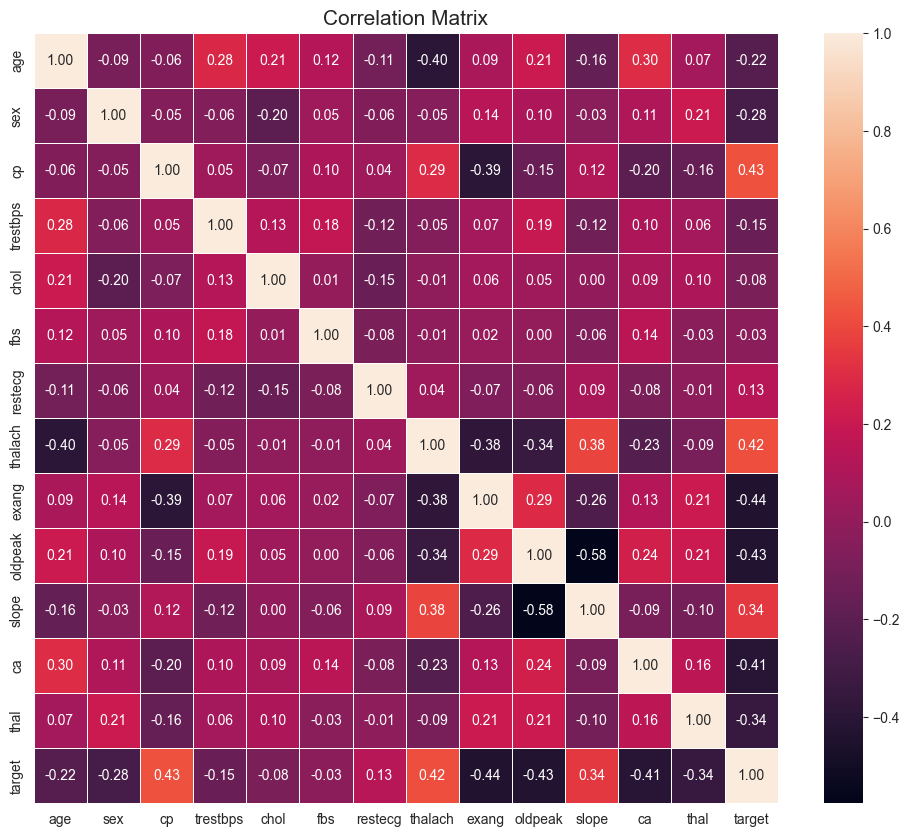

In [11]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix', fontsize=15)
plt.show()

# Correlation with target variable

In [12]:
target_correlation = correlation_matrix['target'].sort_values(ascending=False)
print("Correlation with target variable:")
print(target_correlation)

Correlation with target variable:
target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64


### Pair Plots for Key Features

<Figure size 1200x1000 with 0 Axes>

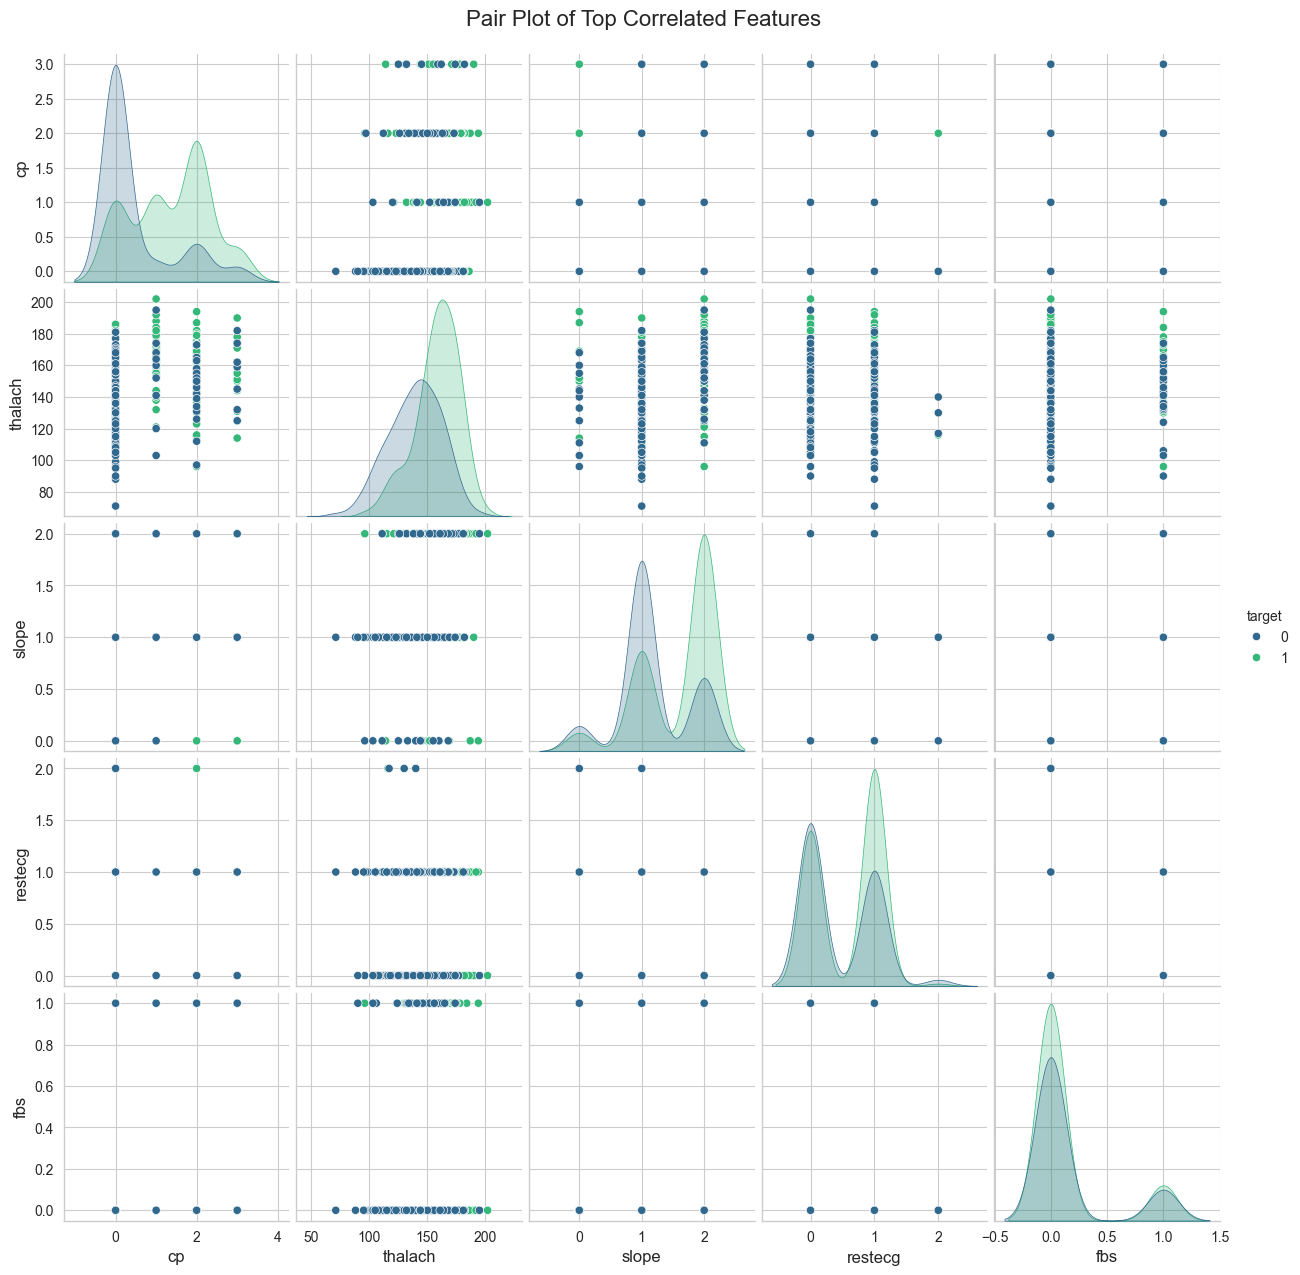

In [13]:
top_features = list(abs(target_correlation[1:6]).index)  # Excluding target itself
top_features.append('target')

plt.figure(figsize=(12, 10))
sns.pairplot(df[top_features], hue='target', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Top Correlated Features', y=1.02, fontsize=16)
plt.show()

## Feature Engineering

### Handling Outliers

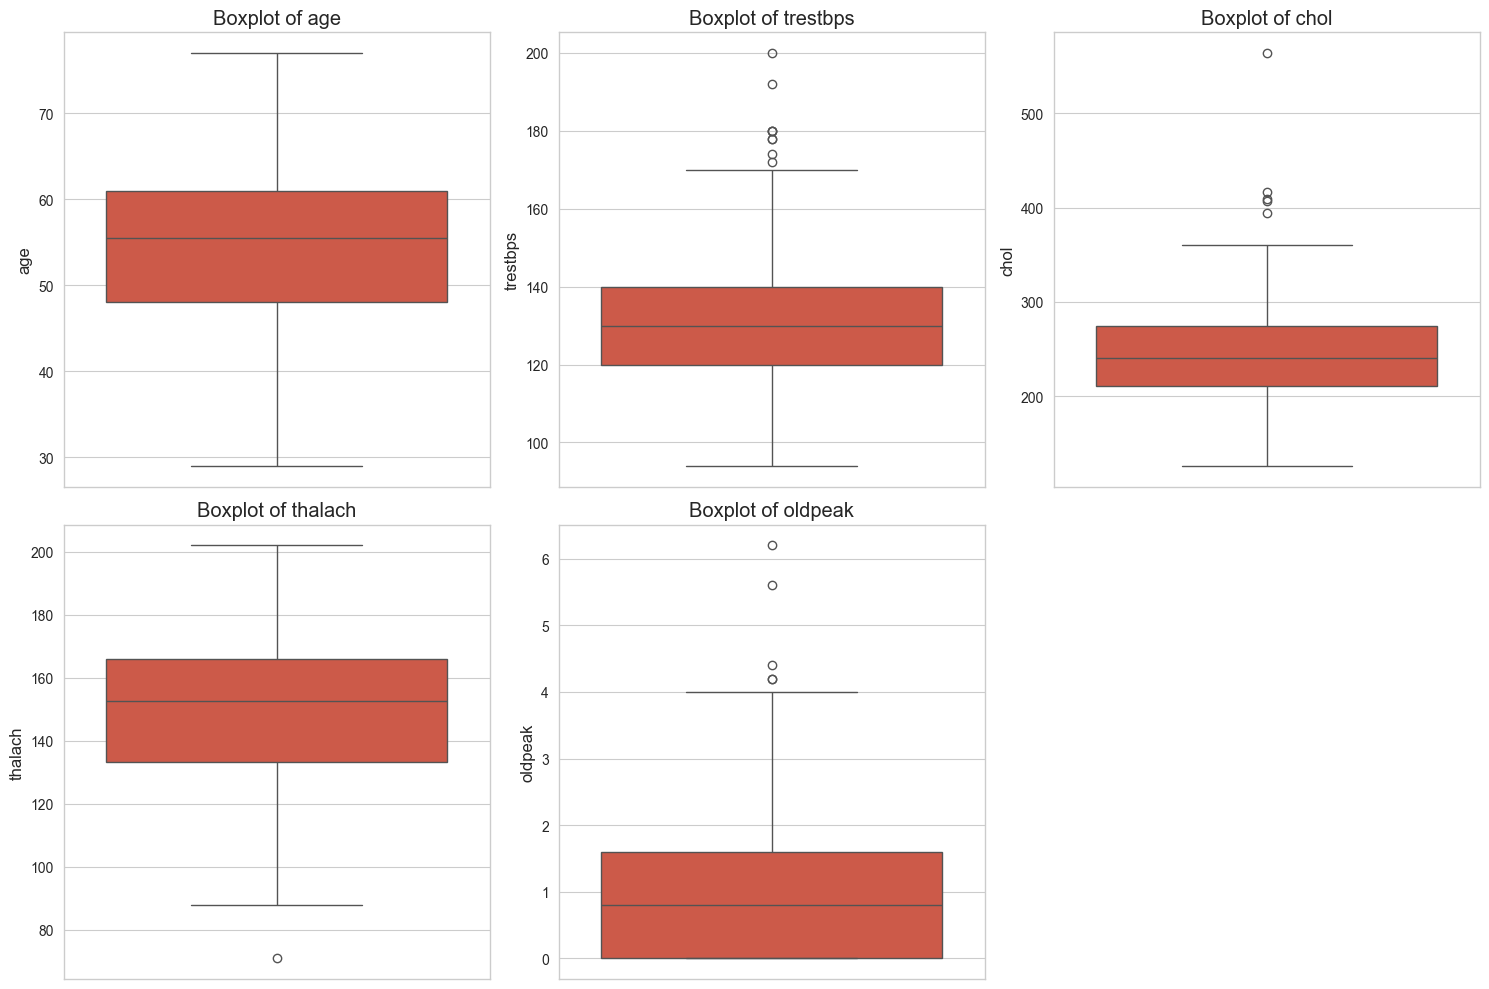

In [14]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Function to detect outliers using IQR method

In [15]:
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

for feature in numerical_features:
    outliers, lower, upper = detect_outliers(df, feature)
    print(f"\nOutliers in {feature}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
    if len(outliers) > 0:
        print(f"Outlier values: {sorted(outliers[feature].unique())}")


Outliers in age:
Number of outliers: 0
Lower bound: 28.50, Upper bound: 80.50

Outliers in trestbps:
Number of outliers: 9
Lower bound: 90.00, Upper bound: 170.00
Outlier values: [np.int64(172), np.int64(174), np.int64(178), np.int64(180), np.int64(192), np.int64(200)]

Outliers in chol:
Number of outliers: 5
Lower bound: 115.38, Upper bound: 370.38
Outlier values: [np.int64(394), np.int64(407), np.int64(409), np.int64(417), np.int64(564)]

Outliers in thalach:
Number of outliers: 1
Lower bound: 84.12, Upper bound: 215.12
Outlier values: [np.int64(71)]

Outliers in oldpeak:
Number of outliers: 5
Lower bound: -2.40, Upper bound: 4.00
Outlier values: [np.float64(4.2), np.float64(4.4), np.float64(5.6), np.float64(6.2)]


# Handle outliers using capping method

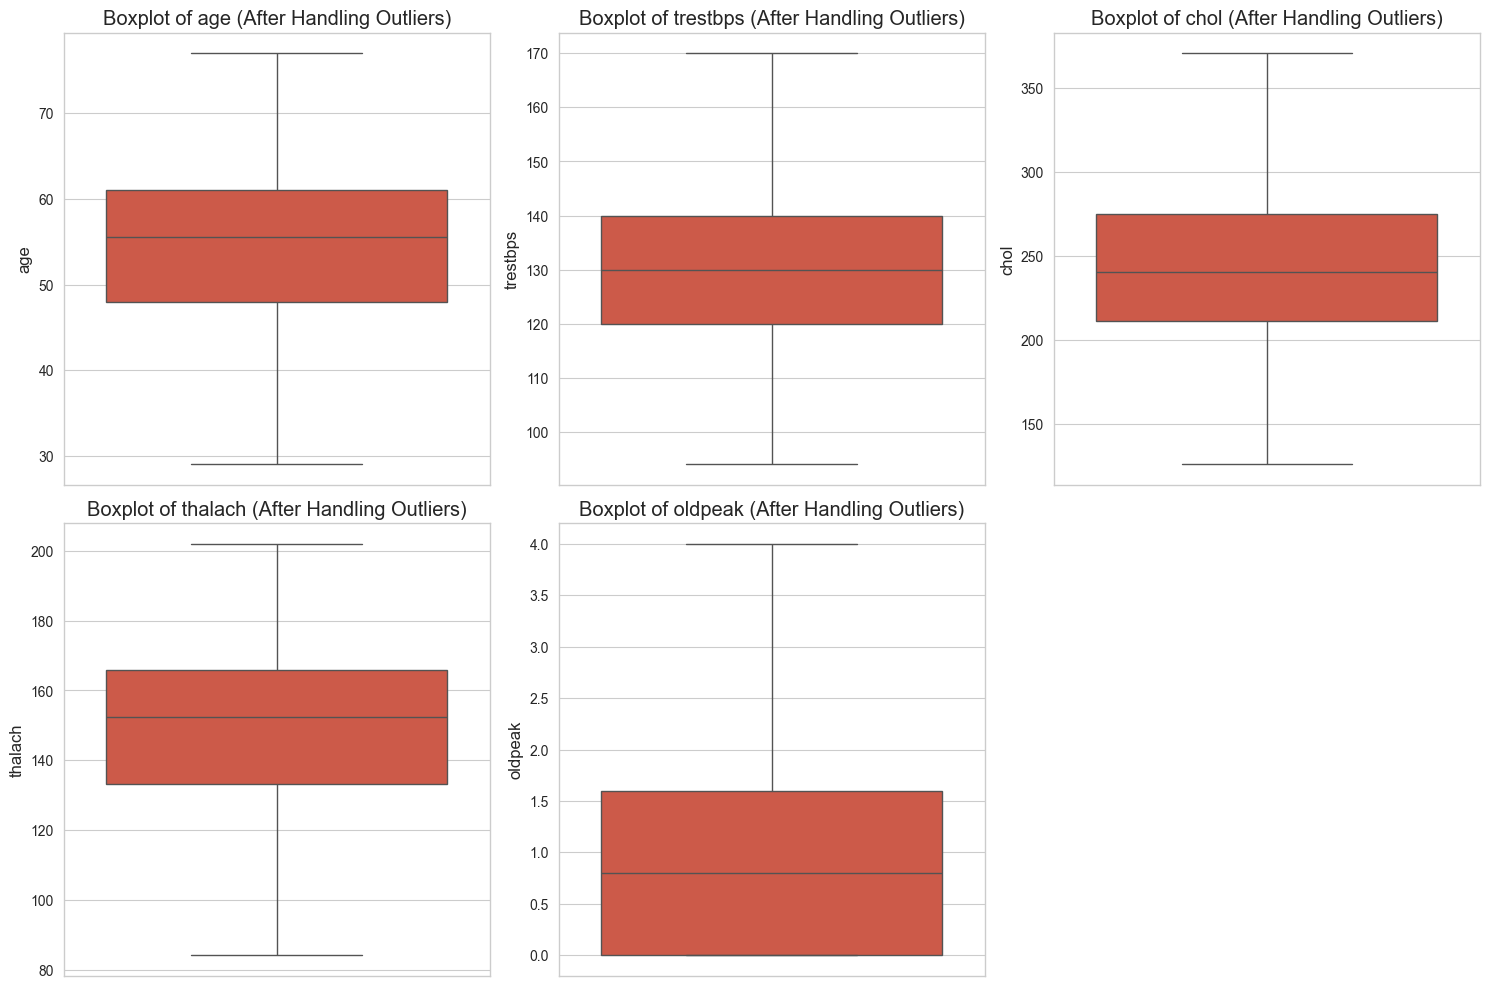

In [16]:
df_clean = df.copy()

for feature in numerical_features:
    _, lower, upper = detect_outliers(df_clean, feature)
    df_clean[feature] = df_clean[feature].clip(lower=lower, upper=upper)

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df_clean[feature])
    plt.title(f'Boxplot of {feature} (After Handling Outliers)')
plt.tight_layout()
plt.show()

### Feature Transformation (Check skewness of numerical features)

In [17]:
skewness = df_clean[numerical_features].skew()
print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
age        -0.203743
trestbps    0.389876
chol        0.335700
thalach    -0.490122
oldpeak     0.993897
dtype: float64


# Apply log transformation to highly skewed features (if any)

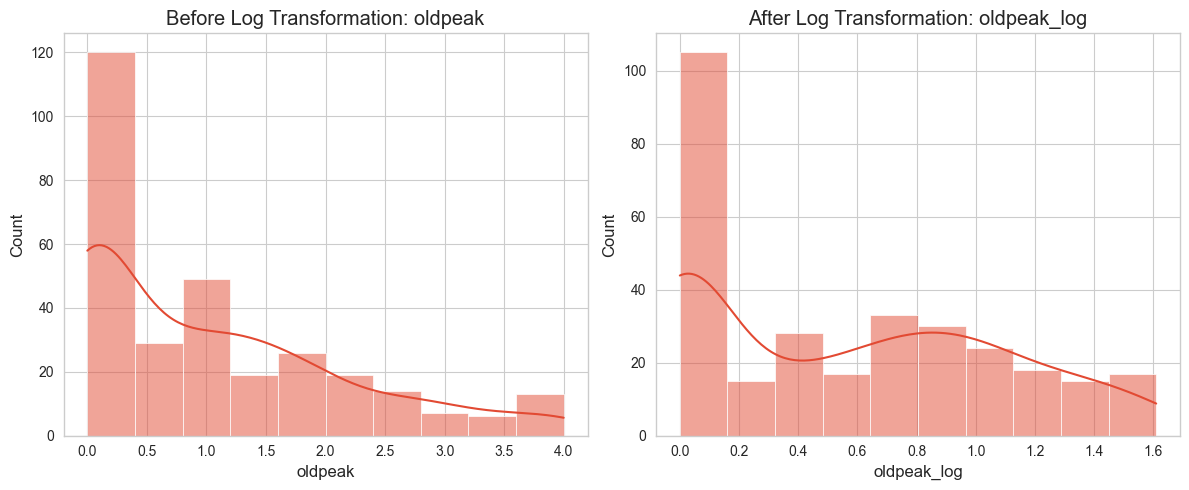

In [18]:
skewed_features = skewness[abs(skewness) > 0.5].index.tolist()

for feature in skewed_features:
    if (df_clean[feature] <= 0).any():
        min_val = df_clean[feature].min()
        if min_val <= 0:
            df_clean[f'{feature}_log'] = np.log(df_clean[feature] - min_val + 1)
        else:
            df_clean[f'{feature}_log'] = np.log(df_clean[feature])
    else:
        df_clean[f'{feature}_log'] = np.log(df_clean[feature])
 
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df_clean[feature], kde=True)
    plt.title(f'Before Log Transformation: {feature}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df_clean[f'{feature}_log'], kde=True)
    plt.title(f'After Log Transformation: {feature}_log')
    
    plt.tight_layout()
    plt.show()

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaled_features = numerical_features.copy()

# Add log-transformed features if they exist
log_features = [col for col in df_clean.columns if '_log' in col]
scaled_features.extend(log_features)

df_scaled = df_clean.copy()
df_scaled[scaled_features] = scaler.fit_transform(df_clean[scaled_features])

df_scaled[scaled_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,-2.588070e-16,1.00166,-2.814192,-0.710788,0.119503,0.728383,2.499671
trestbps,302.0,4.352662e-16,1.00166,-2.247491,-0.679121,-0.075902,0.527318,2.336976
chol,302.0,-1.235215e-16,1.00166,-2.518079,-0.725132,-0.102874,0.619578,2.636642
thalach,302.0,-3.764465e-16,1.00166,-2.881347,-0.719941,0.127023,0.720997,2.304928
oldpeak,302.0,0.000000e+00,1.00166,-0.927166,-0.927166,-0.205506,0.516154,2.681134
oldpeak_log,302.0,-1.646953e-16,1.00166,-1.100236,-1.100236,0.035947,0.746754,2.010784


### Feature Creation (creating xtra categories)

In [20]:

df_clean['age_group'] = pd.cut(df_clean['age'], 
                              bins=[0, 40, 55, 65, 100], 
                              labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])

df_clean['bp_category'] = pd.cut(df_clean['trestbps'], 
                                bins=[0, 120, 130, 140, 180, 300], 
                                labels=['Normal', 'Elevated', 'Stage 1', 'Stage 2', 'Crisis'])

df_clean['chol_category'] = pd.cut(df_clean['chol'], 
                                  bins=[0, 200, 240, 1000], 
                                  labels=['Normal', 'Borderline', 'High'])

df_clean['max_heart_rate'] = 220 - df_clean['age']  
df_clean['heart_reserve'] = df_clean['max_heart_rate'] - df_clean['thalach']

df_clean['chest_pain_angina'] = df_clean['cp'].astype(str) + '_' + df_clean['exang'].astype(str)

df_clean[['age', 'age_group', 'trestbps', 'bp_category', 'chol', 'chol_category', 
          'thalach', 'max_heart_rate', 'heart_reserve', 'chest_pain_angina']].head()

,age,age_group,trestbps,bp_category,chol,chol_category,thalach,max_heart_rate,heart_reserve,chest_pain_angina
0,63,Senior,145,Stage 2,233.0,Borderline,150.0,157,7.0,3_0
1,37,Young,130,Elevated,250.0,High,187.0,183,-4.0,2_0
2,41,Middle-aged,130,Elevated,204.0,Borderline,172.0,179,7.0,1_0
3,56,Senior,120,Normal,236.0,Borderline,178.0,164,-14.0,1_0
4,57,Senior,120,Normal,354.0,High,163.0,163,0.0,0_1


### One-Hot Encoding for Categorical Features

In [21]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 
                    'age_group', 'bp_category', 'chol_category', 'chest_pain_angina']

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

print(f"Shape before encoding: {df_clean.shape}")
print(f"Shape after encoding: {df_encoded.shape}")

df_encoded.head()

Shape before encoding: (302, 21)
Shape after encoding: (302, 42)


,age,trestbps,chol,thalach,oldpeak,target,oldpeak_log,max_heart_rate,heart_reserve,sex_1,...,bp_category_Crisis,chol_category_Borderline,chol_category_High,chest_pain_angina_0_1,chest_pain_angina_1_0,chest_pain_angina_1_1,chest_pain_angina_2_0,chest_pain_angina_2_1,chest_pain_angina_3_0,chest_pain_angina_3_1
0,63,145,233.0,150.0,2.3,1,1.193922,157,7.0,True,...,False,True,False,False,False,False,False,False,True,False
1,37,130,250.0,187.0,3.5,1,1.504077,183,-4.0,True,...,False,False,True,False,False,False,True,False,False,False
2,41,130,204.0,172.0,1.4,1,0.875469,179,7.0,False,...,False,True,False,False,True,False,False,False,False,False
3,56,120,236.0,178.0,0.8,1,0.587787,164,-14.0,True,...,False,True,False,False,True,False,False,False,False,False
4,57,120,354.0,163.0,0.6,1,0.470004,163,0.0,False,...,False,False,True,True,False,False,False,False,False,False


### Feature Selection

Skewness of numerical features:
age        -0.203743
trestbps    0.389876
chol        0.335700
thalach    -0.490122
oldpeak     0.993897
dtype: float64
Features to transform: ['oldpeak']


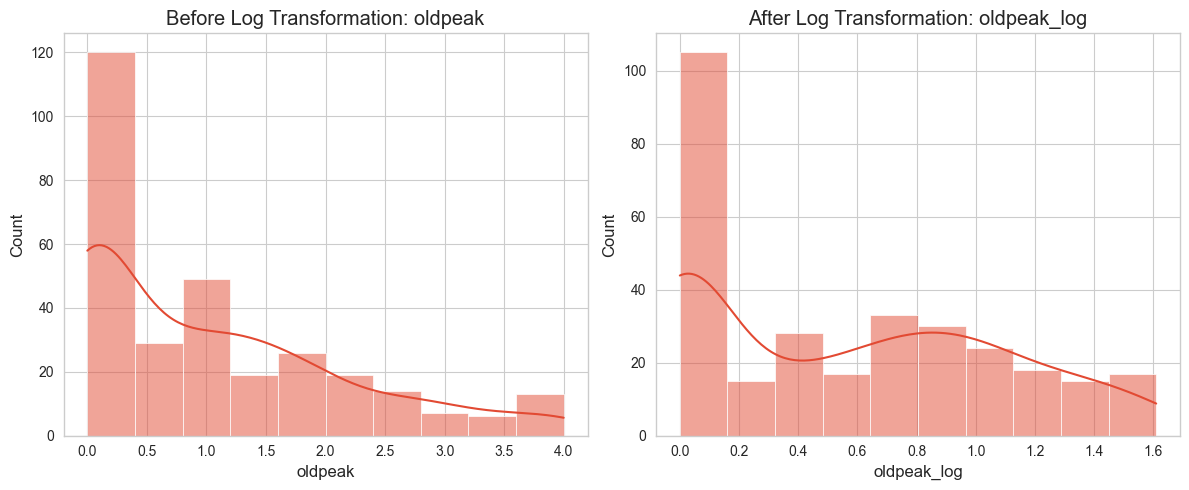

Removing constant features: ['bp_category_Crisis']
Top selected features:
                  Feature       Score
23                 thal_2  114.769795
33  chest_pain_angina_0_1  102.032338
24                 thal_3   92.215953
15                exang_1   70.255191
4                 oldpeak   70.055581
5             oldpeak_log   68.106981
3                 thalach   64.406106
17                slope_2   54.508884
7           heart_reserve   45.184227
16                slope_1   44.742710
10                   cp_2   32.743618
36  chest_pain_angina_2_0   32.325089
8                   sex_1   26.240952
19                   ca_2   24.215654
26       age_group_Senior   21.738350


In [22]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif
skewness = df_clean[numerical_features].skew()
print("Skewness of numerical features:")
print(skewness)

skewed_features = skewness[abs(skewness) > 0.5].index.tolist()
print(f"Features to transform: {skewed_features}")


for feature in skewed_features:
    if (df_clean[feature] <= 0).any():
        min_val = df_clean[feature].min()
        if min_val <= 0:
            df_clean[f'{feature}_log'] = np.log(df_clean[feature] - min_val + 1)
        else:
            df_clean[f'{feature}_log'] = np.log(df_clean[feature])
    else:
        df_clean[f'{feature}_log'] = np.log(df_clean[feature])
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df_clean[feature], kde=True)
    plt.title(f'Before Log Transformation: {feature}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df_clean[f'{feature}_log'], kde=True)
    plt.title(f'After Log Transformation: {feature}_log')
    
    plt.tight_layout()
    plt.show()


X = df_encoded.drop('target', axis=1)
y = df_encoded['target']


constant_features = [col for col in X.columns if X[col].nunique() == 1]
if constant_features:
    print(f"Removing constant features: {constant_features}")
    X = X.drop(columns=constant_features)

selector_var = VarianceThreshold(threshold=0.01)  # Very low threshold to remove only near-constant features
X_var = selector_var.fit_transform(X)
low_var_features = X.columns[~selector_var.get_support()].tolist()
if low_var_features:
    print(f"Features with very low variance: {low_var_features}")
    X = X.drop(columns=low_var_features)

selector = SelectKBest(f_classif, k=min(15, X.shape[1]))  # Ensure k is not larger than number of features
X_selected = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("Top selected features:")
print(feature_scores.head(15))

### Final Dataset Preparation

In [23]:
df_final = df_encoded[list(selected_features) + ['target']]

print(f"Final dataset shape: {df_final.shape}")
df_final.head()

Final dataset shape: (302, 16)


,thalach,oldpeak,oldpeak_log,heart_reserve,sex_1,cp_2,exang_1,slope_1,slope_2,ca_2,thal_2,thal_3,age_group_Senior,chest_pain_angina_0_1,chest_pain_angina_2_0,target
0,150.0,2.3,1.193922,7.0,True,False,False,False,False,False,False,False,True,False,False,1
1,187.0,3.5,1.504077,-4.0,True,True,False,False,False,False,True,False,False,False,True,1
2,172.0,1.4,0.875469,7.0,False,False,False,False,True,False,True,False,False,False,False,1
3,178.0,0.8,0.587787,-14.0,True,False,False,False,True,False,True,False,True,False,False,1
4,163.0,0.6,0.470004,0.0,False,False,True,False,True,False,True,False,True,True,False,1


In [24]:
df_final.to_csv('heart_processed.csv', index=False)
print("Processed dataset saved as 'heart_processed.csv'")

Processed dataset saved as 'heart_processed.csv'


## Summary of EDA and Feature Engineering

### Key Findings from EDA:
1. The dataset contains information about patients with and without heart disease.
2. There are no missing values in the dataset.
3. Some features show strong correlation with the target variable.
4. Certain categorical features like chest pain type (cp) show clear patterns with respect to heart disease diagnosis.
5. Age distribution shows that heart disease is more prevalent in certain age groups.

### Feature Engineering Steps:
1. **Outlier Handling**: Identified and capped outliers in numerical features.
2. **Feature Transformation**: Applied log transformation to skewed features.
3. **Feature Scaling**: Standardized numerical features.
4. **Feature Creation**: Created new features based on domain knowledge:
   - Age groups
   - Blood pressure categories
   - Cholesterol categories
   - Heart rate reserve
   - Combined chest pain and angina feature
5. **One-Hot Encoding**: Encoded categorical features.
6. **Feature Selection**: Selected the most important features using statistical tests.

The final processed dataset is ready for modeling with selected features that have the strongest relationship with the target variable.